In [1]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_1samp
import math
from statsmodels.stats.multitest  import fdrcorrection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.signal import savgol_filter
from scipy import signal
from scipy import stats
import matplotlib.cm as cm
from pygam import LinearGAM, s, f, GAM
from matplotlib import cm
from statsmodels.tsa.stattools import acf

In [2]:
cons = glob.glob(os.path.join('../../Dataset/childhood/timeseries/sub-CBPD*timeseries.tsv'))

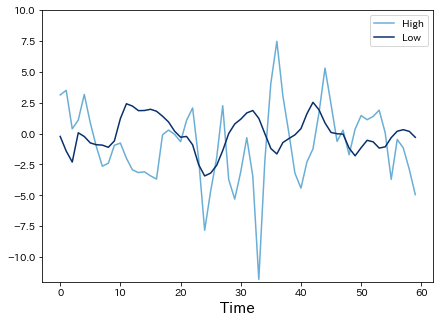

In [3]:
figure = plt.figure(figsize=(7,5))
colors = ['C0', 'C1']
i = 0
for con in cons:
    fsid = os.path.basename(con)[:12]
    if fsid in ['sub-CBPD0154', 'sub-CBPD0169']:
        if i<2:
            con = pd.read_csv(con, sep='\t')
            plt.plot(con.iloc[:60, :400].mean(axis=1), color=cm.Blues((i+1)/2))
            i += 1
plt.ylim([-12,10])
plt.xlabel('Time', size=15)
plt.legend(['High', 'Low'])

d (ARFIMA memory parameter) = -0.59
d (ARFIMA memory parameter) = -0.63


<ipython-input-4-157e8540bd11>:36: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(lag_indices), np.log10(acf_vals[1:]),
<ipython-input-4-157e8540bd11>:36: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(lag_indices), np.log10(acf_vals[1:]),
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


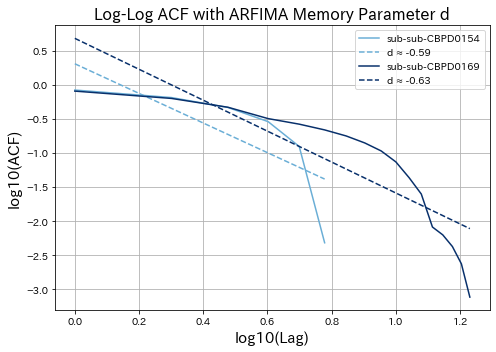

In [4]:
figure = plt.figure(figsize=(7, 5))
colors = ['C0', 'C1']
i = 0

for con in cons:
    fsid = os.path.basename(con)[:12]
    if fsid in ['sub-CBPD0154', 'sub-CBPD0169']:
        if i < 2:
            # Read and preprocess data
            con_data = pd.read_csv(con, sep='\t')
            time_series = con_data.iloc[:, :400].mean(axis=1)

            # Compute autocorrelation
            lags = 30
            acf_vals = acf(time_series, nlags=lags, fft=True)

            lag_indices = np.arange(1, lags + 1)  # Define lag indices before usage
            
            # Mask out zeros and negatives (to avoid log issues)
            valid = acf_vals[1:] > 0
            log_lags = np.log10(lag_indices[valid])
            log_acf = np.log10(acf_vals[1:][valid])

            # Now fit line
            if len(log_lags) > 2:
                slope, intercept = np.polyfit(log_lags, log_acf, 1)
                
                # Convert slope to d using ARFIMA relation: slope = 2d - 1 => d = (slope + 1) / 2
                d = (slope + 1) / 2
                print(f"d (ARFIMA memory parameter) = {d:.2f}")
            else:
                d = None
                print("Not enough valid points to estimate d.")

            # Plot log-log ACF
            plt.plot(np.log10(lag_indices), np.log10(acf_vals[1:]), 
                     color=cm.Blues((i + 1) / 2), label=f'sub-{fsid}')

            # Plot fitted line showing power-law decay
            if d is not None:
                plt.plot(log_lags, intercept + slope * log_lags,
                         linestyle='--', color=cm.Blues((i + 1) / 2),
                         label=f'd ≈ {d:.2f}')

            i += 1

plt.xlabel('log10(Lag)', fontsize=15)
plt.ylabel('log10(ACF)', fontsize=15)
plt.title('Log-Log ACF with ARFIMA Memory Parameter d', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sampleimg.eps')